# Hacktiv8 Phase 0: Graded Challenge 2

---

Graded Challenge ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Linear Algebra dan Calculus.

## Introduction

By [Rifky Aliffa](https://github.com/Penzragon)

### Dataset

![Image](https://cdn.cnn.com/cnnnext/dam/assets/201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg)

Dataset yang digunakan adalah gambar seekor anjing rhodesian ridgeback yang berukuran 438 x 780 pixels. Gambar dapat diunduh dari [sini](https://cdn.cnn.com/cnnnext/dam/assets/201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg).

### Objective

Dari sebuah gambar, gunakan konsep gradien untuk mendeteksi edge pada gambar dan lakukan operasi perkalian matriks pada gambar. Dengan langkah-langkah sebagai berikut:

1. Hitung vektor gradien (turunan parsial) masing-masing pixel untuk masing-masing sumbu x dan y dengan rumus:

   $\frac{\partial I}{\partial x},\frac{\partial I}{\partial y}$

2. Hitung gradient magnitude tiap pixel dengan rumus:

   $\sqrt{(\frac{\partial I}{\partial x})^{2} + (\frac{\partial I}{\partial y})^{2}}$

3. Jika nilai magnitude melebihi angka threshold, maka edge terdeteksi (Biasanya threshold ~ 30).
4. Untuk operasi matriks, buat matriks dengan nilai apapun yang bersesuaian dengan ukuran gambar dan sesuai dengan aturan perkalian matriks.

## Import Library

Mengimport semua library yang akan digunakan, dalam project ini hanya menggunakan **NumPy** dan **Matplotlib**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Data Loading

Membuat matrix dari sebuah file `.jpg` menggunakan function `imread`.

In [2]:
image = plt.imread('201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg')

### Data Characteristic

Melihat isi dari data (matrix).

In [3]:
image

array([[[ 86,  93,  39],
        [ 86,  94,  37],
        [ 87,  90,  35],
        ...,
        [ 48,  41,  15],
        [ 46,  39,  11],
        [ 59,  52,  23]],

       [[ 77,  84,  30],
        [ 77,  84,  30],
        [ 78,  83,  27],
        ...,
        [ 46,  38,  15],
        [ 64,  57,  29],
        [ 37,  30,   1]],

       [[ 64,  73,  20],
        [ 66,  73,  19],
        [ 68,  73,  17],
        ...,
        [ 56,  48,  27],
        [ 46,  36,  11],
        [ 70,  60,  33]],

       ...,

       [[165, 150, 107],
        [159, 144, 101],
        [151, 134,  91],
        ...,
        [150, 138,  86],
        [149, 137,  85],
        [145, 134,  80]],

       [[164, 149, 108],
        [157, 142, 101],
        [149, 131,  91],
        ...,
        [155, 143,  93],
        [153, 141,  91],
        [148, 136,  84]],

       [[164, 149, 108],
        [157, 142, 101],
        [148, 130,  90],
        ...,
        [160, 148, 100],
        [157, 145,  95],
        [150, 138,  88]]

In [4]:
image.shape

(438, 780, 3)

Dari bentuk (438, 780, 3) ini dapat diketahui bahwa data ini adalah array 3-D yang berupa gambar **RGB** dengan ukuran **438 x 780 pixels**, dimana:
- 480 menandakan pixel vertical.
- 780 menandakan pixel horizontal.
- 3 menandakan channel (Red, Green, Blue).

Melihat data dalam bentuk gambar.

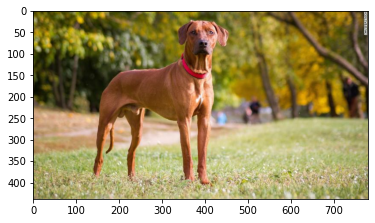

In [5]:
plt.imshow(image)

## Data Preprocessing

### Data Slicing

Pada bagian ini akan dilakukan ekstraksi channel (Red, Green, Blue) dari data.

In [6]:
Red = image[:,:,0]
Green = image[:,:,1]
Blue = image[:,:,2]

- Channel berindex **0** adalah matrix yang nilainya merepresentasikan warna **merah** ![#f03c15](https://via.placeholder.com/15/f03c15/000000?text=+)
- Channel berindex **1** adalah matrix yang nilainya merepresentasikan warna **hijau** ![#c5f015](https://via.placeholder.com/15/c5f015/000000?text=+)
- Channel berindex **2** adalah matrix yang nilainya merepresentasikan warna **biru** ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+)

Melakukan plotting dari hasil ekstraksi channel.

Text(0.5, 1.0, 'Gambar Filter B')

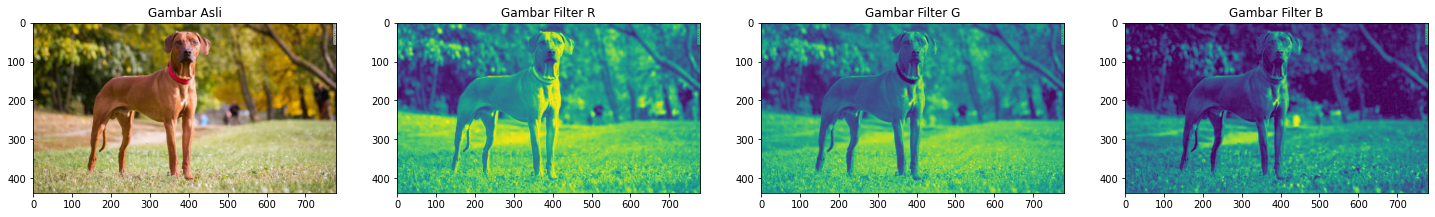

In [7]:
fig, ax = plt.subplots(ncols=4,figsize=(25,5))
ax[0].imshow(image)
ax[0].set_title('Gambar Asli')
ax[1].imshow(Red)
ax[1].set_title('Gambar Filter R')
ax[2].imshow(Green)
ax[2].set_title('Gambar Filter G')
ax[3].imshow(Blue)
ax[3].set_title('Gambar Filter B')

### Grayscale

Setelah tiap channel diekstrak dari data, selanjutnya merubah data gambar menjadi bentuk grayscale dengan rumus: 

**0.299 x R + 0.587 x G + 0.114 x B**

In [8]:
Gray = 0.299 * Red + 0.587 * Green + 0.114 * Blue

Menampilkan data yang sudah dirubah menjadi grayscale.

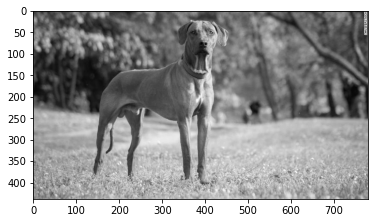

In [9]:
plt.imshow(Gray, cmap='gray')

In [10]:
Gray.shape

(438, 780)

Setelah data gambar dirubah menjadi grayscale, data tidak lagi berbentuk array 3-D melaikan menjadi array 2-D (matrix) yang berupa gambar **438 x 780 pixels**.

## Image Processing

### Matrix Operation

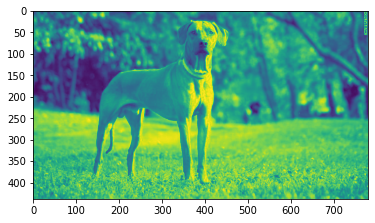

In [24]:
plt.imshow(Red)

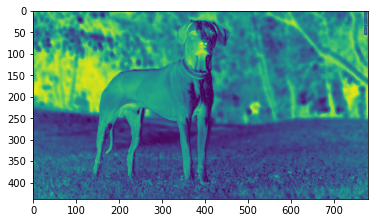

In [23]:
plt.imshow(Red @ ((-1)*np.eye(780)))

### Partial Derivative

In [27]:
dx, dy = np.gradient(Gray)

Text(0.5, 1.0, 'dy')

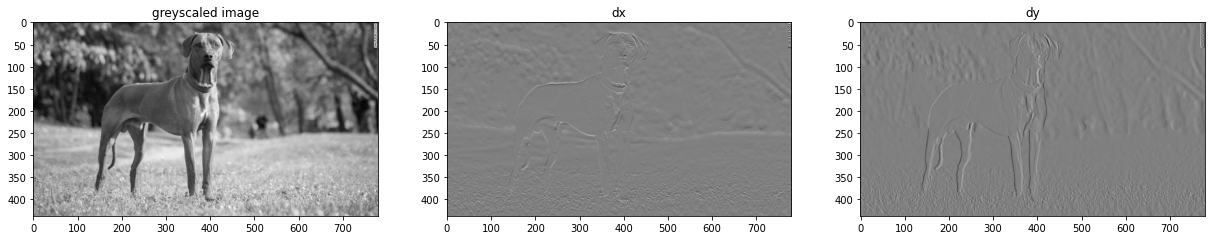

In [29]:
fig, ax = plt.subplots(ncols=3,figsize=(21,5))
ax[0].imshow(Gray, cmap='gray')
ax[0].set_title('greyscaled image')
ax[1].imshow(dx, cmap='gray')
ax[1].set_title('dx')
ax[2].imshow(dy, cmap='gray')
ax[2].set_title('dy')

### Gradient Magnitude

In [37]:
magnitude = np.sqrt(dx**2 + dy**2)

In [38]:
magnitude

array([[  9.00715721,   9.40800521,   8.11033626, ...,   2.82183154,
         18.7722732 ,  25.49605844],
       [ 10.242     ,  10.1843726 ,   8.89490287, ...,   7.03965173,
          4.57699164,  27.49518871],
       [  8.75538806,   9.0101237 ,   8.02792383, ..., 107.56861748,
         15.269887  ,  31.18010802],
       ...,
       [  6.03220575,   7.98814166,   9.75569067, ...,   2.12720621,
          2.64970536,   3.63451995],
       [  7.01063449,   8.54058114,   8.6589405 , ...,   5.24223044,
          5.47594668,   5.74321254],
       [  7.        ,   8.9945    ,   9.0499188 , ...,   5.24602461,
          6.49253387,   7.34601824]])

In [39]:
magnitude.shape

(438, 780)

### Edge Detection

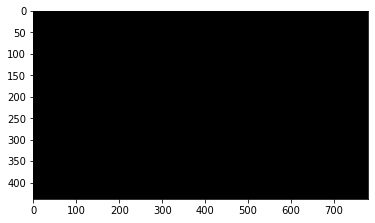

In [40]:
plt.imshow(magnitude == 30, cmap='gray')

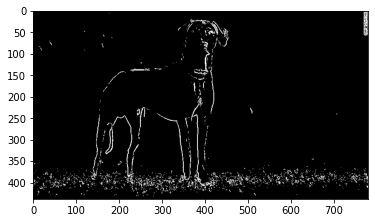

In [41]:
plt.imshow(magnitude > 30, cmap='gray')

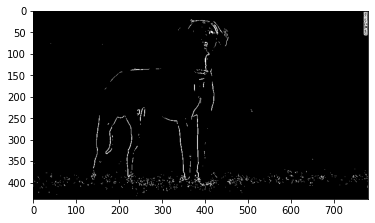

In [42]:
plt.imshow(magnitude > 40, cmap='gray')

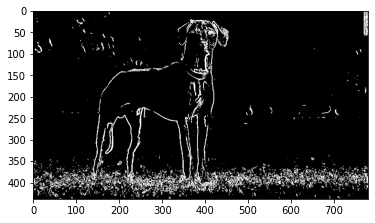

In [43]:
plt.imshow(magnitude > 20, cmap='gray')

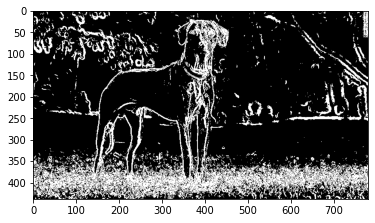

In [44]:
plt.imshow(magnitude > 10, cmap='gray')